In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataset.shape

(891, 12)

In [6]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
nan_catfeat = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtype=='O']

for feature in nan_catfeat:
    print('{}: {}% missing values'.format(feature, np.round(dataset[feature].isnull().mean(), 4)))
    

Cabin: 0.771% missing values
Embarked: 0.0022% missing values


In [8]:
# now we drop Cabin since so many nan values
dataset.drop(['Cabin'], axis=1, inplace=True)

In [9]:
mode = dataset['Embarked'].mode()
mode = mode[0]

In [10]:
dataset['Embarked']= dataset['Embarked'].fillna(mode)
dataset['Embarked'].isnull().sum()

0

In [11]:
## Now lets handle Numerical features which are missing
nan_numfeat = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtype!='O']
for feature in nan_numfeat:
    print('{}: {}% missing values'.format(feature, np.round(dataset[feature].isnull().mean(), 4)))

Age: 0.1987% missing values


In [12]:
# mean of the mean and mode of the 'Age' column
agemode = 26

In [13]:
# fillin missing values in Age column using mean of mean and mode of the column
dataset['Age'] = dataset['Age'].fillna(agemode)

In [14]:
dataset['Age'].isnull().sum()

0

In [15]:
# Now our dataset have no missing values
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Text(0.5, 1.0, 'EDA ')

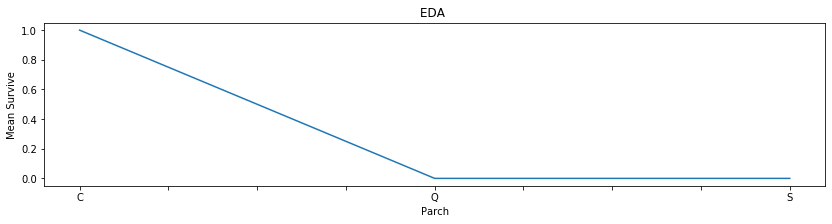

In [17]:
# relationship with Survival
plt.figure(figsize=(14,3))
dataset.groupby('Embarked')['Survived'].median().plot()
plt.xlabel('Parch')
plt.ylabel('Mean Survive')
plt.title('EDA ')

In [18]:
# Dropping  ticket number
dataset.drop(['Ticket','PassengerId','Name'], axis=1, inplace=True)

In [19]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
dataset['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [21]:
embarked = pd.get_dummies(dataset.Embarked, prefix="Emb")

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
dataset['Sex'] = LabelEncoder().fit_transform(dataset['Sex'])
train_data = dataset

In [24]:
train_data = pd.concat([dataset, embarked], axis=1)

In [25]:
train_data.drop(['Embarked'], axis=1, inplace=True)

In [26]:
train_data.drop(['Fare','Emb_S','Emb_C','Emb_Q'], axis=1, inplace=True)

In [27]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


### TEST DATA FEATURE ENGINEERING

In [28]:

testd = pd.read_csv('test.csv')

In [29]:
testd.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
# now we drop Cabin since so many nan values
testd.drop(['Cabin'], axis=1, inplace=True)

In [31]:
testd['Embarked']= testd['Embarked'].fillna(mode)
testd['Embarked'].isnull().sum()

0

In [32]:
testd['Age'] = testd['Age'].fillna(agemode)
# # Dropping  ticket number
testd.drop(['Ticket','PassengerId','Name'], axis=1, inplace=True)


In [33]:
embarked = pd.get_dummies(testd.Embarked, prefix="Emb")
testd['Sex'] = LabelEncoder().fit_transform(testd['Sex'])

In [34]:
embarked

,Emb_C,Emb_Q,Emb_S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [35]:
test_data = pd.concat([testd, embarked], axis=1)

In [36]:
test_data.drop(['Fare','Emb_S','Emb_C','Emb_Q'], axis=1, inplace=True)

In [37]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,Q
1,3,0,47.0,1,0,S
2,2,1,62.0,0,0,Q
3,3,1,27.0,0,0,S
4,3,0,22.0,1,1,S


In [71]:
test_data.drop(['Embarked'], axis=1, inplace=True)

In [38]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


## feature selection

In [39]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [40]:
X = train_data.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

In [41]:
X.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,1,22.0,1,0
1,1,0,38.0,1,0
2,3,0,26.0,0,0
3,1,0,35.0,1,0
4,3,1,35.0,0,0


In [42]:
y = train_data.iloc[:,0]

In [43]:
train_data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.543351,-0.058958,-0.035322,0.081629
Pclass,-0.338481,1.000000,0.131900,-0.348738,0.083081,0.018443
Sex,-0.543351,0.131900,1.000000,0.077385,-0.114631,-0.245489
Age,-0.058958,-0.348738,0.077385,1.000000,-0.233278,-0.164041
SibSp,-0.035322,0.083081,-0.114631,-0.233278,1.000000,0.414838
Parch,0.081629,0.018443,-0.245489,-0.164041,0.414838,1.000000


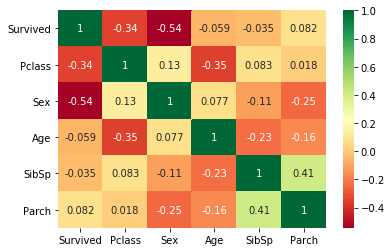

In [44]:
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(X,y)

ExtraTreesClassifier()

In [46]:
print(selection.feature_importances_)

[0.1423483  0.37688365 0.36977933 0.0620758  0.04891291]


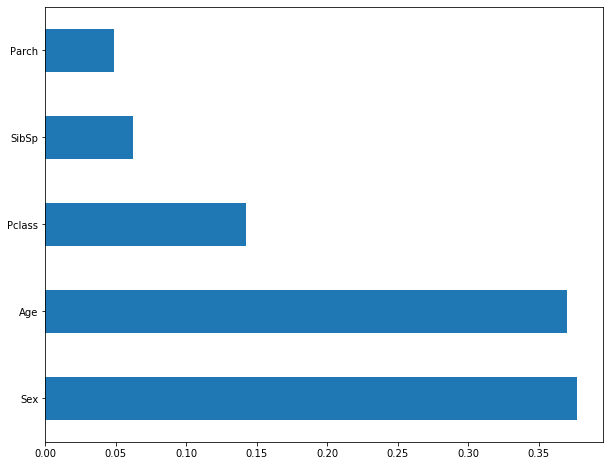

In [47]:
plt.figure(figsize=(10,8))
imp_feat = pd.Series(selection.feature_importances_, index= X.columns)
imp_feat.nlargest(7).plot(kind='barh')
plt.show()

### Fitting Model

In [48]:
# splitting train data to find the acuracy of the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [50]:
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_cl= RandomForestClassifier()

In [56]:
n_estimators = [int(x) for x in np.linspace(start=30, stop=1200, num=12)]
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
max_features = ['auto', 'sqrt']
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [57]:
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [58]:
cv_rf_cl = RandomizedSearchCV(estimator=rf_cl, param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=15,cv=7,verbose=2,random_state=0,n_jobs=1)

In [59]:
cv_rf_cl.fit(X_train,y_train)

Fitting 7 folds for each of 15 candidates, totalling 105 fits
[CV] n_estimators=880, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=880, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=880, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=880, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=880, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=880, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=880, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=880, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.2s
[CV] n_estimators=880, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=880, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=880, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=880, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=880, min_samples_split=10

[CV]  n_estimators=349, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=349, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=349, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=136, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=136, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.2s
[CV] n_estimators=136, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=136, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.2s
[CV] n_estimators=136, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=136, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.2s
[CV] n_estimators=136, min_samples_split=5, mi

[CV]  n_estimators=880, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=880, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=880, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=880, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=880, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=880, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=880, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=1093, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1093, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.5s
[CV] n_estimators=1093, min_samples_split=5, min

[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:  1.6min finished


RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [30, 136, 242, 349, 455,
                                                         561, 668, 774, 880,
                                                         987, 1093, 1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [60]:
cv_rf_cl.best_params_

{'n_estimators': 136,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [61]:
rf_cl = RandomForestClassifier(n_estimators=136,min_samples_split=15,min_samples_leaf=1,max_features='sqrt',max_depth=5)
rf_cl.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=15,
                       n_estimators=136)

In [62]:
# Predicting train data for getting the accuracy
y_pred = rf_cl.predict(X_test)

In [63]:
rf_cl.score(X_train,y_train)

0.844311377245509

In [64]:
rf_cl.score(X_test,y_test)

0.820627802690583

In [72]:
# Now predicting Test data that will be submitted
real_pred = rf_cl.predict(test_data)

In [182]:
from sklearn import metrics

In [74]:
pred=pd.DataFrame(real_pred)

In [76]:
pred.isnull().sum()

0    0
dtype: int64

In [78]:
sub_df=pd.read_csv('gender_submission.csv')

In [79]:
sub_df.head(1)

,PassengerId,Survived
0,892,0.0


In [80]:
datasets=pd.concat([sub_df['PassengerId'],pred],axis=1)

In [81]:
datasets.columns=['PassengerId','Survived']

In [82]:
datasets.head(1)

,PassengerId,Survived
0,892,0


In [83]:
datasets['Survived'] = datasets['Survived'].astype('Int64')

In [84]:
datasets.to_csv('gender_submission.csv',index=False)

In [ ]:
# ignore this cell
# ##Create Sample Submission file and Submit using ANN
# pred=pd.DataFrame(y_pred)
# sub_df=pd.read_csv('gender_submission.csv')
# datasets=pd.concat([sub_df['PassengerId'],pred],axis=1)
# datasets.columns=['PassengerId','Survived']
# datasets.to_csv('gender_submission.csv',index=False)

In [ ]:
n_estimators=136,min_samples_split=15,min_samples_leaf=1,max_features='sqrt',max_depth=5)
rf_cl.fit(X_train,y_train